In [1]:
import drnb.embed.pipeline as pl

/home/james/dev/drnb-plugin/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Uniform Manifold Approximation with Two-phase Optimization (UMATO: [arxiv](https://arxiv.org/abs/2205.00420), [github](https://github.com/hyungkwonko/umato)) is a UMAP like method that lays out data in three stages: first, hubs (points with lots of neighbors) are laid out, then non-hubs, then outliers, with slightly different treatment of each, the idea being that the hubs represent the global layout of the data the best, while outliers tend to distort the layout. The authors claim that this gives better global preservation across multiple datasets.

Parameters you might want to play with:

* `n_neighbors=50`: larger than the default `15` with UMAP. 
* `hub_num=300`: the number of items in the dataset which are part of the global embedding.
* `global_n_epochs=None` (defaults to 100): number of epochs for the global hub embedding.
* `local_n_epochs=None` (defaults to 50): number of epochs for the local (non-hub but not outlier) embedding.
* `global_learning_rate=0.0065`: learning rate for the global embedding stage.
* `local_learning_rate=0.01`: learning rate for the local embedding stage.
* `gamma=0.1` This exists in the UMAP code base (in the API as `repulsion_strength`) but is rarely changed from its default value of 1 (which is like not using it). `gamma` is used in the UMATO code in a similar way. It is smaller than the default UMAP value (also to reduce the effect of hub interactions in the non-hub layout code), but the learning rates are even more reduced so it's not entirely clear to me what the overall effect would be.
* `init="pca"`. PCA initialization. Or: 
    * `"random"` (Gaussian with standard deviation 0.05)
    * `"spectral"` (the [sklearn SpectralEmbedding](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html) method)
    * or user-defined coordinates (although non-hub coordinates are ignored). 
    
    In the PCA, random and user-defined case, the coordinates are normalized to 0-1 by dividing by the largest value (so in the `"random"` case this changes the standard deviation to closer to 0.19).


[15:19:15] INFO     Getting dataset s1k                                              ]8;id=498180;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=277570;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#246\246]8;;\

           INFO     Embedding                                                        ]8;id=970342;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=402885;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#249\249]8;;\

           INFO     [external:umato] launching: /home/james/.local/bin/uv run        ]8;id=917464;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=790740;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#156\156]8;;\
                    --color never --quiet drnb-plugin-run.py --method umato                         
                    --request /tmp/drnb-umato-yjn177bi/request.json                                 

[15:19:19] INFO     /home/james/dev/drnb-plugin/plugins/umato/.venv/lib/python3.12/s ]8;id=98062;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=890434;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    ite-packages/umato/distances.py:24: SyntaxWarning: invalid                      
                    escape sequence '\s'                                                            

           INFO       """Standard euclidean distance.                                ]8;id=91578;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=224005;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     /home/james/dev/drnb-plugin/plugins/umato/.venv/lib/python3.12/s ]8;id=101241;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=973503;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    ite-packages/umato/distances.py:37: SyntaxWarning: invalid                      
                    escape sequence '\s'                                                            

           INFO       """Standard euclidean distance and its gradient.               ]8;id=992079;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=597883;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     /home/james/dev/drnb-plugin/plugins/umato/.venv/lib/python3.12/s ]8;id=7302;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=51100;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    ite-packages/umato/distances.py:53: SyntaxWarning: invalid                      
                    escape sequence '\s'                                                            

           INFO       """Euclidean distance standardised against a vector of         ]8;id=320261;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=543381;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    standard                                                                        

           INFO     /home/james/dev/drnb-plugin/plugins/umato/.venv/lib/python3.12/s ]8;id=335960;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=502126;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    ite-packages/umato/distances.py:68: SyntaxWarning: invalid                      
                    escape sequence '\s'                                                            

           INFO       """Euclidean distance standardised against a vector of         ]8;id=345704;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=956484;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    standard                                                                        

           INFO     /home/james/dev/drnb-plugin/plugins/umato/.venv/lib/python3.12/s ]8;id=736984;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=605372;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    ite-packages/umato/distances.py:84: SyntaxWarning: invalid                      
                    escape sequence '\s'                                                            

           INFO       """Manhattan, taxicab, or l1 distance.                         ]8;id=838538;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=650310;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     /home/james/dev/drnb-plugin/plugins/umato/.venv/lib/python3.12/s ]8;id=286954;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=877261;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    ite-packages/umato/distances.py:98: SyntaxWarning: invalid                      
                    escape sequence '\s'                                                            

           INFO       """Manhattan, taxicab, or l1 distance with gradient.           ]8;id=650498;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=530089;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     /home/james/dev/drnb-plugin/plugins/umato/.venv/lib/python3.12/s ]8;id=511776;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=782295;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    ite-packages/umato/distances.py:113: SyntaxWarning: invalid                     
                    escape sequence '\m'                                                            

           INFO       """Chebyshev or l-infinity distance.                           ]8;id=583604;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=527636;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     /home/james/dev/drnb-plugin/plugins/umato/.venv/lib/python3.12/s ]8;id=879061;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=250484;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    ite-packages/umato/distances.py:127: SyntaxWarning: invalid                     
                    escape sequence '\m'                                                            

           INFO       """Chebyshev or l-infinity distance with gradient.             ]8;id=72864;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=681025;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     /home/james/dev/drnb-plugin/plugins/umato/.venv/lib/python3.12/s ]8;id=687897;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=795827;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    ite-packages/umato/distances.py:147: SyntaxWarning: invalid                     
                    escape sequence '\l'                                                            

           INFO       """Minkowski distance.                                         ]8;id=753814;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=299487;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     /home/james/dev/drnb-plugin/plugins/umato/.venv/lib/python3.12/s ]8;id=419815;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=967754;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    ite-packages/umato/distances.py:166: SyntaxWarning: invalid                     
                    escape sequence '\l'                                                            

           INFO       """Minkowski distance with gradient.                           ]8;id=749690;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=284463;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     /home/james/dev/drnb-plugin/plugins/umato/.venv/lib/python3.12/s ]8;id=193979;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=877929;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    ite-packages/umato/distances.py:193: SyntaxWarning: invalid                     
                    escape sequence '\d'                                                            

           INFO       """Poincare distance.                                          ]8;id=253659;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=507443;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     /home/james/dev/drnb-plugin/plugins/umato/.venv/lib/python3.12/s ]8;id=213576;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=250939;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    ite-packages/umato/distances.py:230: SyntaxWarning: invalid                     
                    escape sequence '\l'                                                            

           INFO       """A weighted version of Minkowski distance.                   ]8;id=511479;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=622372;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     /home/james/dev/drnb-plugin/plugins/umato/.venv/lib/python3.12/s ]8;id=738625;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=402723;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    ite-packages/umato/distances.py:248: SyntaxWarning: invalid                     
                    escape sequence '\l'                                                            

           INFO       """A weighted version of Minkowski distance with gradient.     ]8;id=438289;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=854626;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     /home/james/dev/drnb-plugin/plugins/umato/.venv/lib/python3.12/s ]8;id=943523;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=980151;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    ite-packages/umato/distances.py:752: SyntaxWarning: invalid                     
                    escape sequence '\l'                                                            

           INFO       """                                                            ]8;id=787333;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=402051;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

[15:19:20] INFO     Running UMATO with params={'verbose': True}                      ]8;id=638322;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=955158;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     UMATO(a=np.float64(1.57694346046584),                            ]8;id=896833;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=710672;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    b=np.float64(0.8950608779639974),                                               

           INFO           verbose=True)                                              ]8;id=513746;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=531909;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     Sun Nov 16 15:19:20 2025 Construct fuzzy simplicial set          ]8;id=727811;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=759017;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     Sun Nov 16 15:19:20 2025 Finding Nearest Neighbors               ]8;id=737751;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=229125;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     Sun Nov 16 15:19:20 2025 Building RP forest with 7 trees         ]8;id=36895;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=679555;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

[15:19:21] INFO     Sun Nov 16 15:19:21 2025 NN descent for 10 iterations            ]8;id=208484;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=335363;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

[15:19:28] INFO              0  /  10                                                ]8;id=332857;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=736189;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

[15:19:29] INFO              1  /  10                                                ]8;id=17692;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=991611;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO              2  /  10                                                ]8;id=354003;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=789430;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     Sun Nov 16 15:19:29 2025 Finished Nearest Neighbor Search        ]8;id=23607;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=489211;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     Sun Nov 16 15:19:29 2025 Build K-nearest neighbor graph          ]8;id=181310;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=725793;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    structure                                                                       

[15:19:32] INFO     Sun Nov 16 15:19:32 2025 Run global optimization                 ]8;id=343301;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=13925;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

[15:19:34] INFO     [INFO] Current loss: 0.603543, @ iteration: 1/100                ]8;id=60845;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=292299;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.963805, @ iteration: 2/100                ]8;id=529387;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=453767;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.725502, @ iteration: 3/100                ]8;id=904764;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=147519;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.716907, @ iteration: 4/100                ]8;id=266074;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=283072;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.711992, @ iteration: 5/100                ]8;id=863403;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=501660;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715548, @ iteration: 6/100                ]8;id=831382;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=577035;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.713615, @ iteration: 7/100                ]8;id=82284;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=391951;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715437, @ iteration: 8/100                ]8;id=359075;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=940277;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.714717, @ iteration: 9/100                ]8;id=646141;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=376075;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715523, @ iteration: 10/100               ]8;id=248650;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=938096;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715258, @ iteration: 11/100               ]8;id=46584;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=626984;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715601, @ iteration: 12/100               ]8;id=527239;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=950513;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715496, @ iteration: 13/100               ]8;id=536896;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=284802;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715663, @ iteration: 14/100               ]8;id=562737;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=746831;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715646, @ iteration: 15/100               ]8;id=24892;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=445692;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715748, @ iteration: 16/100               ]8;id=19222;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=925247;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715766, @ iteration: 17/100               ]8;id=879609;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=274225;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715828, @ iteration: 18/100               ]8;id=310472;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=330571;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715848, @ iteration: 19/100               ]8;id=872097;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=909409;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715883, @ iteration: 20/100               ]8;id=280815;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=734902;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715893, @ iteration: 21/100               ]8;id=646261;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=362242;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715902, @ iteration: 22/100               ]8;id=398540;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=459863;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

[15:19:35] INFO     [INFO] Current loss: 0.715907, @ iteration: 23/100               ]8;id=552348;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=870416;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715919, @ iteration: 24/100               ]8;id=416231;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=181324;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715933, @ iteration: 25/100               ]8;id=259955;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=600772;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715953, @ iteration: 26/100               ]8;id=775493;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=773151;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715944, @ iteration: 27/100               ]8;id=522331;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=384062;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715926, @ iteration: 28/100               ]8;id=599672;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=764438;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715913, @ iteration: 29/100               ]8;id=232110;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=367414;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715905, @ iteration: 30/100               ]8;id=857794;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=788637;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715895, @ iteration: 31/100               ]8;id=863257;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=622413;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715886, @ iteration: 32/100               ]8;id=649477;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=743047;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715875, @ iteration: 33/100               ]8;id=519691;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=187338;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715843, @ iteration: 34/100               ]8;id=245794;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=477988;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715820, @ iteration: 35/100               ]8;id=454240;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=443180;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715808, @ iteration: 36/100               ]8;id=705932;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=675605;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715806, @ iteration: 37/100               ]8;id=737234;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=782845;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715810, @ iteration: 38/100               ]8;id=139187;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=924450;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715794, @ iteration: 39/100               ]8;id=368796;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=5760;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715769, @ iteration: 40/100               ]8;id=451853;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=811408;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715758, @ iteration: 41/100               ]8;id=612716;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=820690;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715751, @ iteration: 42/100               ]8;id=220099;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=495161;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715753, @ iteration: 43/100               ]8;id=954800;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=753355;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715761, @ iteration: 44/100               ]8;id=264508;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=919183;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

[15:19:36] INFO     [INFO] Current loss: 0.715773, @ iteration: 45/100               ]8;id=216725;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=706013;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715784, @ iteration: 46/100               ]8;id=125310;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=953501;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715793, @ iteration: 47/100               ]8;id=733189;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=463013;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715803, @ iteration: 48/100               ]8;id=935240;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=207156;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715815, @ iteration: 49/100               ]8;id=765534;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=558835;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715832, @ iteration: 50/100               ]8;id=130342;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=709134;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715853, @ iteration: 51/100               ]8;id=456206;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=650383;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715868, @ iteration: 52/100               ]8;id=314328;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=426563;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715877, @ iteration: 53/100               ]8;id=226208;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=120431;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715886, @ iteration: 54/100               ]8;id=245823;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=177210;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715892, @ iteration: 55/100               ]8;id=544487;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=930965;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715897, @ iteration: 56/100               ]8;id=609715;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=839879;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715901, @ iteration: 57/100               ]8;id=672263;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=234711;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715902, @ iteration: 58/100               ]8;id=621827;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=29202;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715901, @ iteration: 59/100               ]8;id=358540;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=289977;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715902, @ iteration: 60/100               ]8;id=958136;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=465351;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715905, @ iteration: 61/100               ]8;id=502340;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=227421;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715910, @ iteration: 62/100               ]8;id=248373;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=203593;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715911, @ iteration: 63/100               ]8;id=24115;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=935524;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715910, @ iteration: 64/100               ]8;id=943029;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=51375;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715909, @ iteration: 65/100               ]8;id=531837;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=477456;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715917, @ iteration: 66/100               ]8;id=5979;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=244363;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715902, @ iteration: 67/100               ]8;id=385507;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=654050;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

[15:19:37] INFO     [INFO] Current loss: 0.715882, @ iteration: 68/100               ]8;id=63120;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=953661;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715871, @ iteration: 69/100               ]8;id=702668;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=386052;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715868, @ iteration: 70/100               ]8;id=635135;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=686609;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715867, @ iteration: 71/100               ]8;id=826494;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=658314;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715865, @ iteration: 72/100               ]8;id=336561;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=112164;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715866, @ iteration: 73/100               ]8;id=807182;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=884810;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715855, @ iteration: 74/100               ]8;id=537061;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=219201;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715855, @ iteration: 75/100               ]8;id=506248;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=661277;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715866, @ iteration: 76/100               ]8;id=503943;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=968219;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715870, @ iteration: 77/100               ]8;id=345736;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=987601;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715859, @ iteration: 78/100               ]8;id=170861;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=328880;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715844, @ iteration: 79/100               ]8;id=316764;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=904195;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715831, @ iteration: 80/100               ]8;id=154692;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=670315;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715822, @ iteration: 81/100               ]8;id=303459;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=849428;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715813, @ iteration: 82/100               ]8;id=211180;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=525594;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715804, @ iteration: 83/100               ]8;id=643835;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=689642;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715796, @ iteration: 84/100               ]8;id=631330;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=57251;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715788, @ iteration: 85/100               ]8;id=233896;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=667958;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715781, @ iteration: 86/100               ]8;id=852756;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=971323;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715774, @ iteration: 87/100               ]8;id=865833;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=192977;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715768, @ iteration: 88/100               ]8;id=852313;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=557411;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715762, @ iteration: 89/100               ]8;id=177033;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=152566;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715757, @ iteration: 90/100               ]8;id=444865;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=464215;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715753, @ iteration: 91/100               ]8;id=571970;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=757052;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715749, @ iteration: 92/100               ]8;id=751308;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=155940;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715745, @ iteration: 93/100               ]8;id=484977;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=366401;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715742, @ iteration: 94/100               ]8;id=15407;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=40828;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715739, @ iteration: 95/100               ]8;id=193305;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=764483;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

[15:19:38] INFO     [INFO] Current loss: 0.715736, @ iteration: 96/100               ]8;id=776426;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=415532;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715733, @ iteration: 97/100               ]8;id=666916;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=566111;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715731, @ iteration: 98/100               ]8;id=570268;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=895863;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715728, @ iteration: 99/100               ]8;id=464945;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=610366;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     [INFO] Current loss: 0.715725, @ iteration: 100/100              ]8;id=484518;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=324270;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     Sun Nov 16 15:19:38 2025 Get NN indices & Initialize them using  ]8;id=200343;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=357592;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\
                    original hub information                                                        

[15:19:47] INFO     Sun Nov 16 15:19:47 2025 Run local optimization                  ]8;id=265943;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=414363;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

[15:19:48] INFO     Sun Nov 16 15:19:48 2025 Embedding outliers                      ]8;id=597349;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=848040;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

[15:19:53] INFO     Sun Nov 16 15:19:53 2025 Finished embedding                      ]8;id=732334;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=453868;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     Saving results to /tmp/drnb-umato-yjn177bi/result.npz            ]8;id=482018;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=813465;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

           INFO     Evaluating                                                       ]8;id=914620;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=375175;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#271\271]8;;\

           INFO     rte-5-euclidean                                                       ]8;id=926710;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py\base.py]8;;\:]8;id=618447;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=474497;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=713429;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                  ]8;id=416293;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=943213;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=218375;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=96102;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=304543;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=354558;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

[15:19:54] INFO     rpc-5-euclidean                                                       ]8;id=6711;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py\base.py]8;;\:]8;id=393698;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=374649;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=554984;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                  ]8;id=471397;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=981557;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=954958;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=614234;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=515111;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=640144;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     nnp-[15, 50, 150]-noself-euclidean                                    ]8;id=399522;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py\base.py]8;;\:]8;id=713482;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py#61\61]8;;\

[15:19:55] INFO     Plotting                                                         ]8;id=584701;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=304952;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#281\281]8;;\

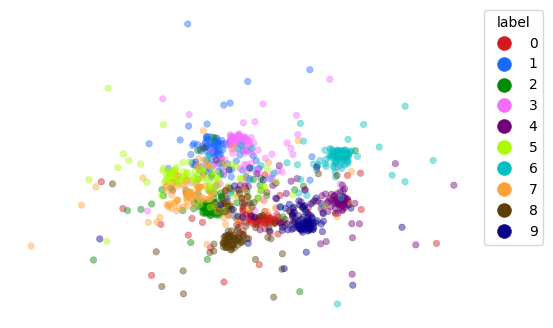

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.6334000000000001), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.42120096), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.19460000000000002), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.33314), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.4172066666666667), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [2]:
pl.standard_eval(
    method="umato",
    params=dict(verbose=True),
    dataset="s1k",
    verbose=True,
)

           INFO     Getting dataset mnist                                            ]8;id=610674;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=537429;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#246\246]8;;\

[15:19:57] INFO     Embedding                                                        ]8;id=333327;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=878270;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#249\249]8;;\

           INFO     [external:umato] launching: /home/james/.local/bin/uv run        ]8;id=599075;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=623054;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#156\156]8;;\
                    --color never --quiet drnb-plugin-run.py --method umato                         
                    --request /tmp/drnb-umato-n8upngvp/request.json                                 

[15:20:00] INFO     Running UMATO with params={}                                     ]8;id=253279;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=768859;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

[15:23:46] INFO     Saving results to /tmp/drnb-umato-n8upngvp/result.npz            ]8;id=230798;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=773408;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#299\299]8;;\

[15:23:47] INFO     Evaluating                                                       ]8;id=464545;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=84984;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#271\271]8;;\

           INFO     rte-5-euclidean                                                       ]8;id=281777;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py\base.py]8;;\:]8;id=376541;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=660091;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=955155;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/mnist.5.1337.idx.npy                ]8;id=885465;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=524610;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=9713;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=750132;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=577658;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=707638;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     rpc-5-euclidean                                                       ]8;id=323012;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py\base.py]8;;\:]8;id=768200;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=491247;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=157667;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/mnist.5.1337.idx.npy                ]8;id=6430;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=124431;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=133056;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=542900;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=316891;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=652471;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     nnp-[15, 50, 150]-noself-euclidean                                    ]8;id=468257;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py\base.py]8;;\:]8;id=408507;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py#61\61]8;;\

[15:23:53] INFO     Plotting                                                         ]8;id=928573;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=338324;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#281\281]8;;\

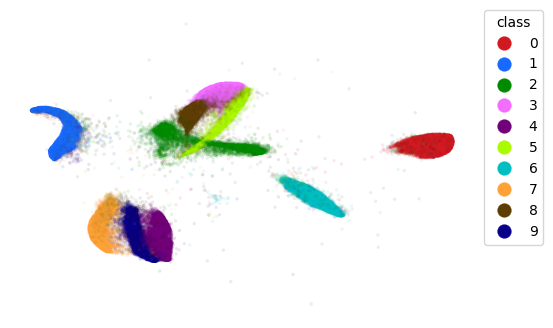

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.6389542857142858), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.4232031), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.06458857142857143), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.13009971428571432), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.21498638095238098), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [3]:
pl.standard_eval(
    method="umato",
    dataset="mnist",
    verbose=True,
)

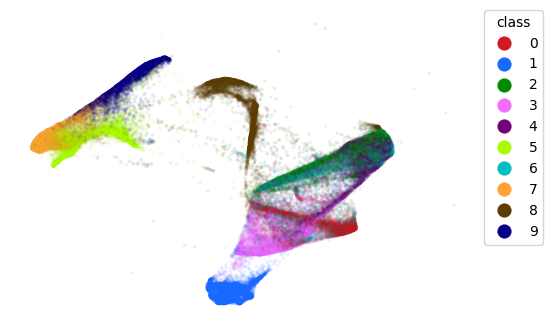

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.7682285714285715), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.67472965), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.07310857142857144), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.14117285714285718), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.2287655238095238), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [4]:
pl.standard_eval(method="umato", dataset="fashion")

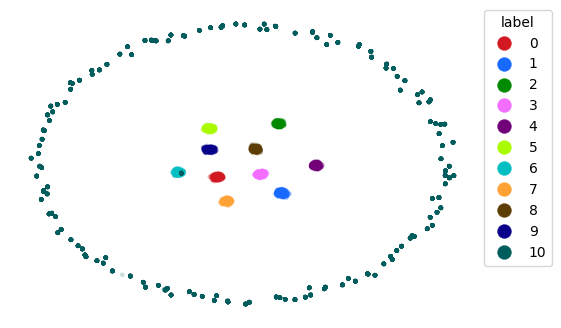

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.6970200000000001), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.7087631), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.03673333333333334), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.07741400000000002), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.17394666666666667), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [5]:
pl.standard_eval(method="umato", dataset="spheres")